<a href="https://colab.research.google.com/github/nalika/ESOF3675/blob/main/Lab_4_Scikit_Learn_(Solved).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Name:** (First_Name) (Last_Name)

**Student ID:** (XXXXXXXXXX)

**Lab No.:** 4

**Colab link:**

# Lab 4 Annoucement

In this lab you will work with

- Scikit-Learn
- Linear Regression
- Logistic Regression
- binary classification. 
- cross-validation method for model validation
- R-squared, ROC, and AUC for performance evaluation
- Decision tree

# Initial Setup

**The following steps only needs to be done once per session.**

1. Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


2. Create Symbolic Links for the Data folder
  - Navigate to the Data folder on the file explorer tool on the left side.
  - Right-click on it and select the option `Copy Path`
  - Make sure this path is the same as the first aagument on the command below. Replace the current first argument if needed.

In [ ]:
# Ensure the paths below are correct by checking the file structure on the left panel.
# If needed, right-click on each Folder, then copy and past below the path.
!ln -sfT '/content/drive/MyDrive/Colab Notebooks/2021.1 WA ESOF-3675/Data' 'data'

**Missing something**

In case you are missing the `Data` folder or the files for the `house-prices` dataset.

1. Create a folders called `Data/zip-files` somewhere in your google drive. This folder could be used to also keep other datasets.

2. Go to the [Kaggle competition webpage](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data), and click on *Download All*. A zip file will be download to your computer. 

3. Upload `zip` file from Kaggle inside the `Data/zip-file` folder. Use the command below to `unzip` its content. Adjust the path if needed.

In [ ]:
!unzip -q '/content/data/zip-files/house-prices-advanced-regression-techniques.zip' -d '/content/data/house-prices'

**Update Packages**

In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 4.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Imports

In [ ]:
import numpy as np
import pandas as pd
import sklearn

**Ensure you have the latest stable version, `scikit-learn 0.24.1`**

In [ ]:
sklearn.__version__

'0.24.1'

# Loading Data

In [ ]:
df_house_train = pd.read_csv('/content/data/house-prices/train.csv')

In [ ]:
df_house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preparation

**Numpy Representations**

`Numpy` arrays are needed when working with `Scikit-learn`.  Let's write a function that splits a given dataframe into data and target.

In [ ]:
def df_to_numpy(dataframe, target_column='SalePrice'):
  df = dataframe.copy() # Ensures we don't alter the original dataframe.
  data = df.drop(columns=['Id', target_column]).to_numpy()
  target = df[target_column].to_numpy()
  return data, target

In [ ]:
df_sale_price_train = df_house_train.select_dtypes(include='number').dropna()
x_price_train, y_price_train = df_to_numpy(df_sale_price_train, target_column='SalePrice')

# Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 1. Let's split the train into `train` and `validation`
x_train, x_val, y_train, y_val = train_test_split(x_price_train, y_price_train, random_state=0)

In [ ]:
# 2. We can combine a liner regression model with transforms for pre-processing in a pipe structure for chaining operations.
pipe_linear_regression = make_pipeline(
  StandardScaler(),
  LinearRegression()
)

**Task 1:**

- Use the created pipe to `fit` the model using `x_train` and `y_train`

In [ ]:
# 3. Fitting Model
pipe_linear_regression.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

**Task 2:**

- Use the trained pipe to `predict` the training data `x_train`.

In [ ]:
y_train_pred = pipe_linear_regression.predict(x_train)

**Task 3:**

- Use `mean_squared_error` and `r2_score` to evaluate the quality of the model on the training data.

In [ ]:
mean_squared_error(y_train, y_train_pred)

1097023094.3170176

In [ ]:
r2_score(y_train, y_train_pred)

0.847040162409831

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Enginnering Categorical Target

`SalePrice` is numerical. In order to illustrate the use of classification models, we need to have a categorical target. First we will produce a binary target, after we also produce a multiclass target.

**Recall That**

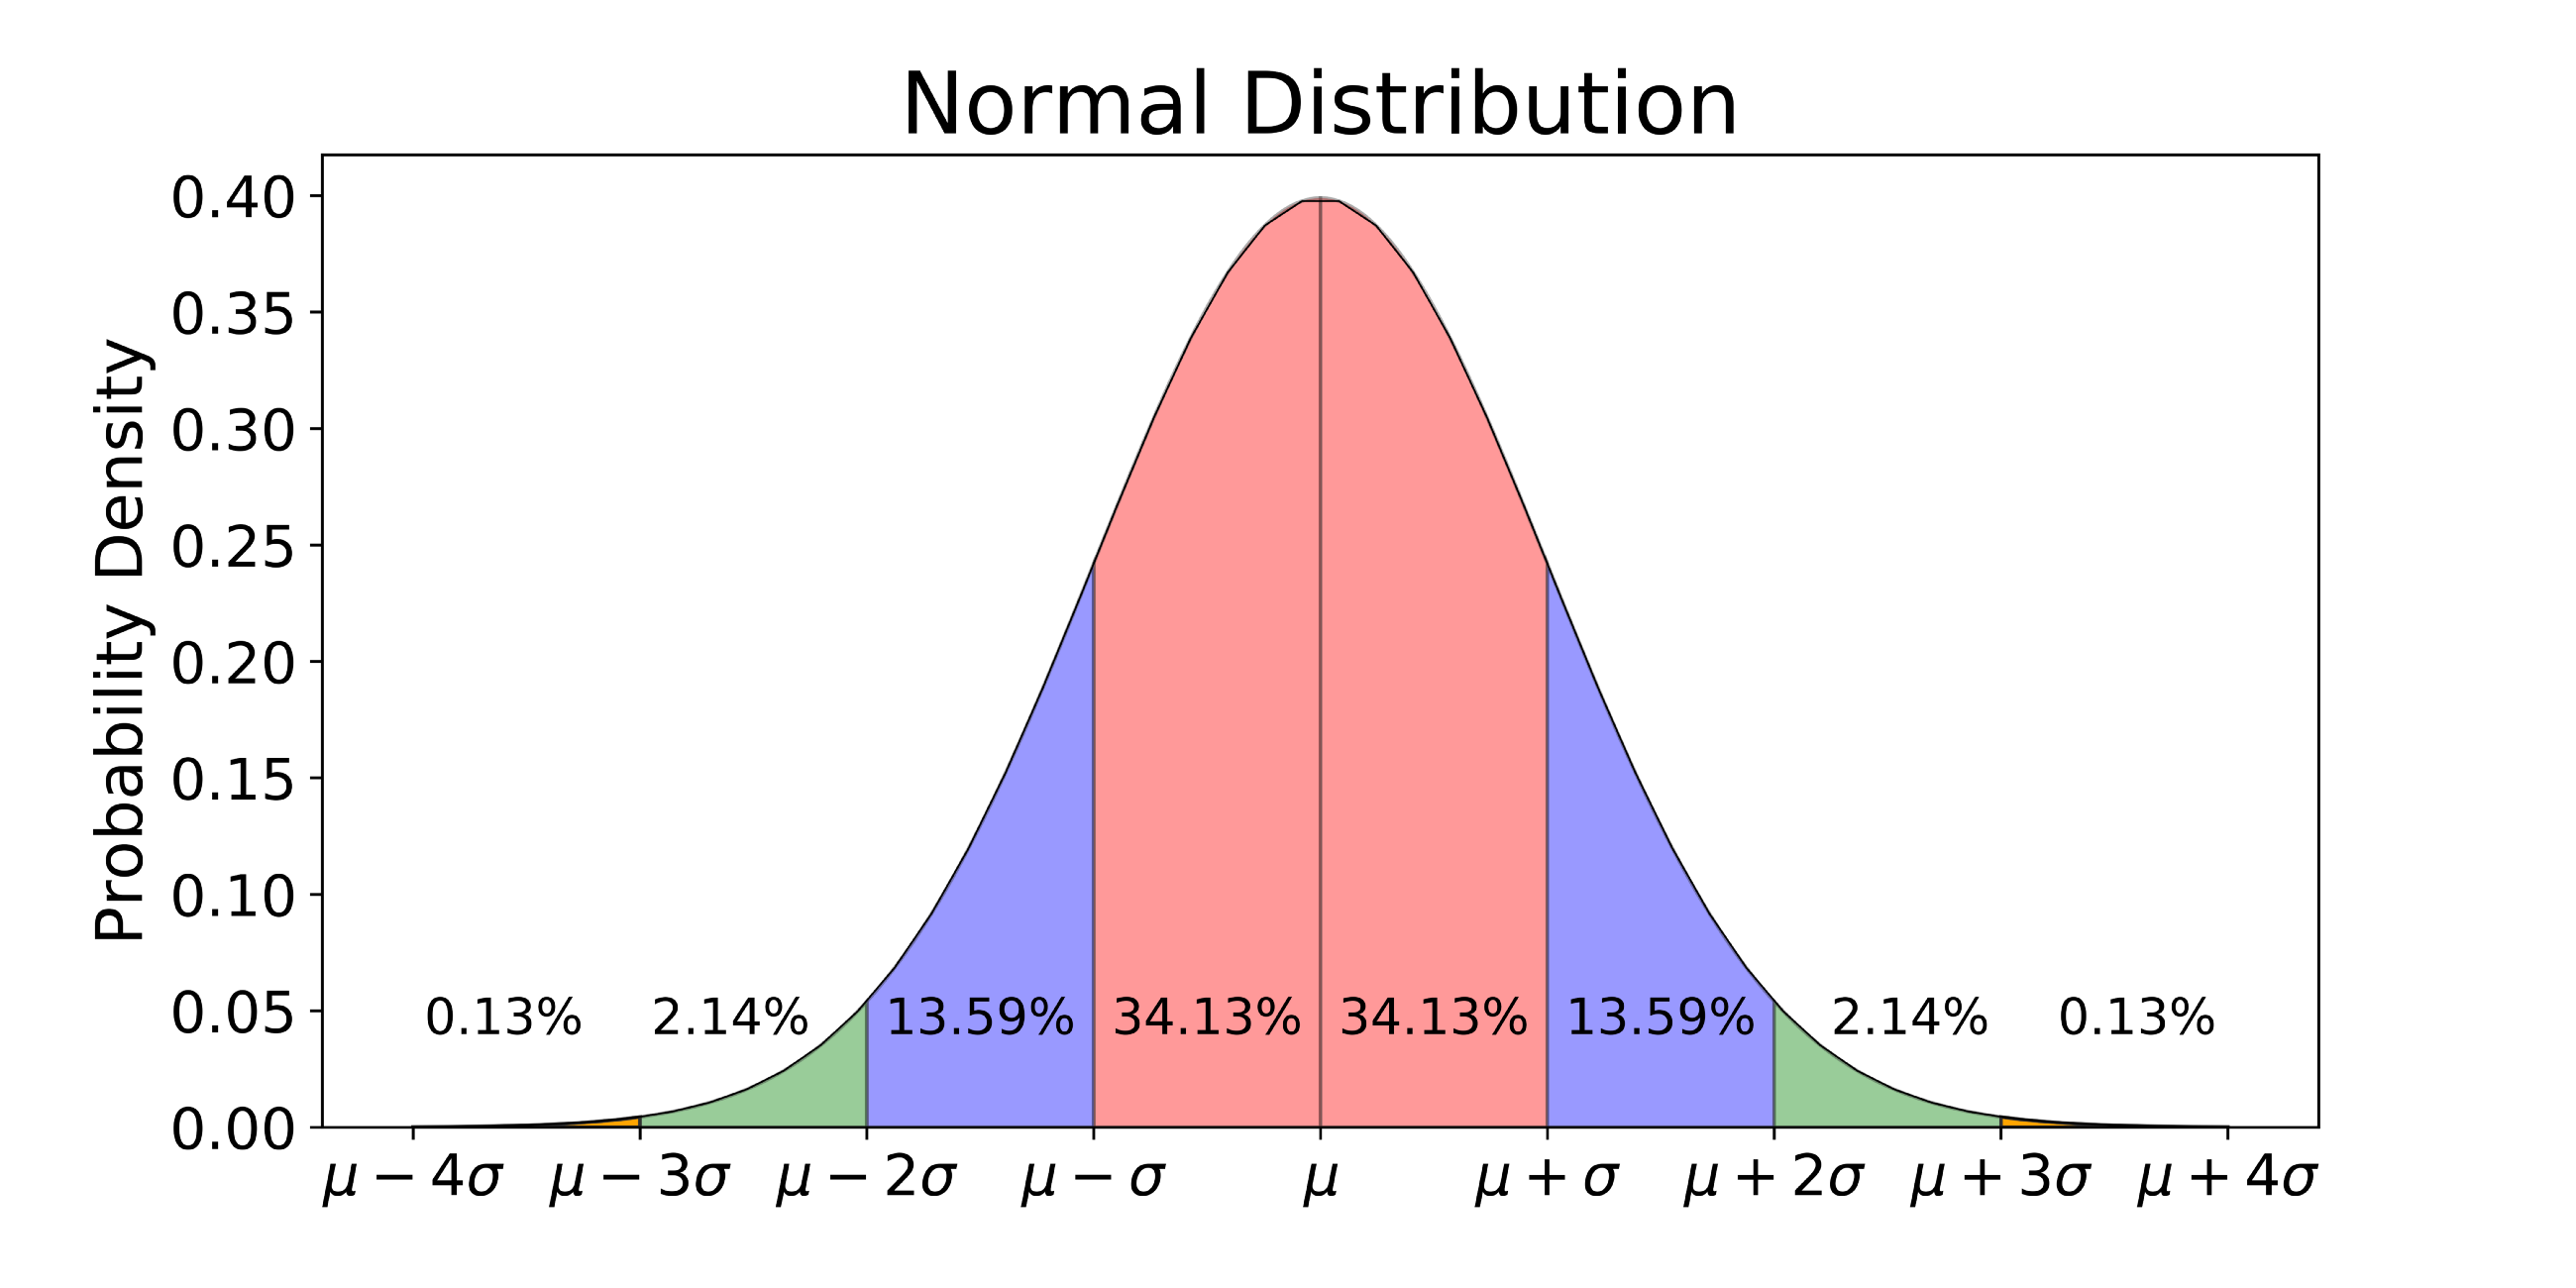

**Binary Class Target**

Let's use the `mean` and `std` to build a binary attribute to be predicted. If true, the sample will be considered `high price`. 

In [ ]:
df_is_high = df_sale_price_train.copy() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
mean = df_is_high['SalePrice'].mean()
std = df_is_high['SalePrice'].std()
threshold = mean + std
threshold

268505.3115468413

In [ ]:
df_is_high['SalePrice'] = df_is_high['SalePrice'] >= threshold

In [ ]:
df_is_high[['SalePrice']].value_counts()

SalePrice
False        972
True         149
dtype: int64

In [ ]:
df_is_high.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,False
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,False
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,True
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,False
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,False
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,0,134,1040,1040,0,0,1040,1,0,1,0,3,1,5,0,1965.0,1,384,0,0,0,0,0,0,0,2,2008,False


**Multiclass Target**

In [ ]:
df_price_range = df_sale_price_train.copy() 

In [ ]:
mean = df_price_range['SalePrice'].mean()
std = df_price_range['SalePrice'].std()
threshold1 = mean - std
threshold2 = mean + std
threshold1, threshold2

(102506.99353790443, 268505.3115468413)

In [ ]:
def get_price_range(price):
  if price < threshold1: return 'cheap'
  elif price < threshold2: return 'average'
  else: return 'expansive'

df_price_range['SalePrice'] = df_price_range['SalePrice'].map(get_price_range)

In [ ]:
df_price_range[['SalePrice']].value_counts()

SalePrice
average      892
expansive    149
cheap         80
dtype: int64

In [ ]:
df_price_range.head(15)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,average
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,average
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,average
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,average
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,average
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,average
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,expansive
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,average
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,average
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,0,134,1040,1040,0,0,1040,1,0,1,0,3,1,5,0,1965.0,1,384,0,0,0,0,0,0,0,2,2008,average


## Logistic Regression Binary Target

In [ ]:
x_is_high, y_is_high = df_to_numpy(df_is_high, target_column='SalePrice')

**Task 4:**

- Complete the pipeline below in order to build a logistic regression model. Hint: check included modules

In [ ]:
# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

**Task 5:**

- Fit the model to the training data. Then predict it on the traing data.

In [ ]:
pipe.fit(x_is_high, y_is_high)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
y_is_high_pred = pipe.predict(x_is_high)

**Task 6:**

- Use `accuracy_score` to evaluate the model

In [ ]:
accuracy_score(y_is_high, y_is_high_pred)

0.9669937555753791

## Logistic Regression Multiclass Target

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
x_price_range, y_price_range = df_to_numpy(df_price_range, target_column='SalePrice')

**Task 7:**

- Create another pipeline for a Logistic Regression model.
- Use this pipeline to `cross_validate` the regression model using `x_price_range` and `y_price_range` data. Use 4 Folds.

In [ ]:
# create a pipeline object
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [ ]:
results = cross_validate(pipe, x_price_range, y_price_range, cv=4)
results['test_score']

array([0.91103203, 0.92142857, 0.93214286, 0.9       ])

# Decision Trees

In [ ]:
from sklearn import tree

**Task 8:**

- Create a decision Tree Classifier and fit it to `x_price_range` and `y_price_range` data.
- Plot the learned tree model

In [ ]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_price_range, y_price_range)

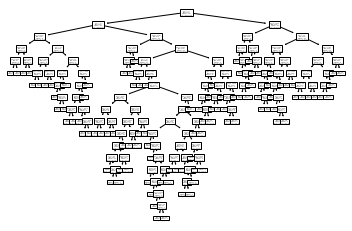

In [ ]:
tree.plot_tree(tree_clf);

**Alternatively the tree can be ploted using graphviz**

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(tree_clf, out_file=None,
                                feature_names=df_price_range.columns[1:-1],  
                                class_names=df_price_range.columns[-1],  
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data)

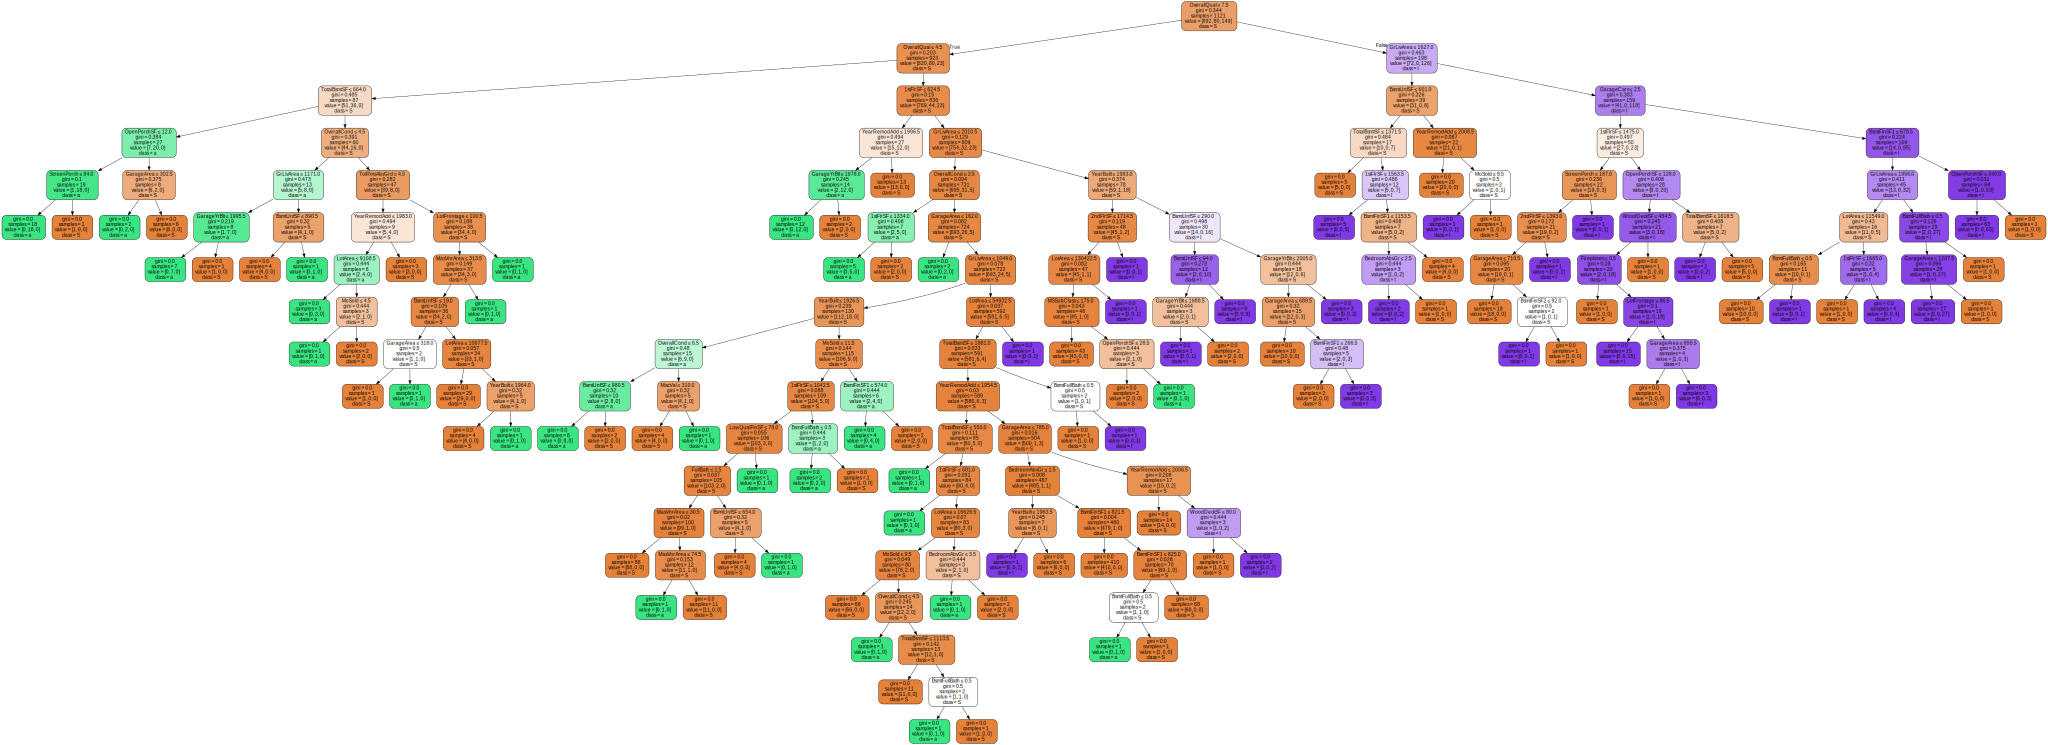

In [ ]:
graph

## Let's Visualize the ROC Curve

[Reference](https://stackabuse.com/understanding-roc-curves-with-python/)

In [ ]:
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x_is_high, y_is_high, test_size=.3)

**Task 9:**

- Use the `train_x` and `train_y` data to train a `RandomForestClassifier` model.
- This time, **do not** use a pipeline.

In [ ]:
model = RandomForestClassifier()
model.fit(train_x, train_y)

RandomForestClassifier()

**Task 10:**

- Use the probabilities of the positive class of the learn model to compute the values for displaying the `roc_curve`
- Use the provided plot function do display the curve.
- Compute the value of the Area Under the Curve.

In [ ]:
probs = model.predict_proba(test_x)
probs_pos = probs[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(test_y, probs_pos)

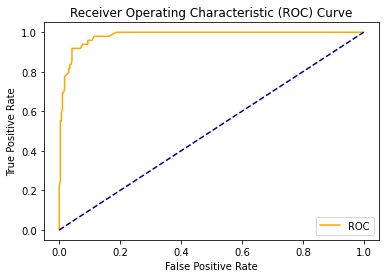

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
auc = roc_auc_score(test_y, probs_pos)
print('AUC: %.2f' % auc)

AUC: 0.98
